<a href="https://colab.research.google.com/github/Resourcepaul/Divorce-Prediction/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Bootcamp/divorce.csv')
df.head()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [ ]:
df.isna().sum()

Sorry_end                        0
Ignore_diff                      0
begin_correct                    0
Contact                          0
Special_time                     0
No_home_time                     0
2_strangers                      0
enjoy_holiday                    0
enjoy_travel                     0
common_goals                     0
harmony                          0
freeom_value                     0
entertain                        0
people_goals                     0
dreams                           0
love                             0
happy                            0
marriage                         0
roles                            0
trust                            0
likes                            0
care_sick                        0
fav_food                         0
stresses                         0
inner_world                      0
anxieties                        0
current_stress                   0
hopes_wishes                     0
know_well           

In [ ]:
df.duplicated().sum()

20

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 169
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Sorry_end                      150 non-null    int64
 1   Ignore_diff                    150 non-null    int64
 2   begin_correct                  150 non-null    int64
 3   Contact                        150 non-null    int64
 4   Special_time                   150 non-null    int64
 5   No_home_time                   150 non-null    int64
 6   2_strangers                    150 non-null    int64
 7   enjoy_holiday                  150 non-null    int64
 8   enjoy_travel                   150 non-null    int64
 9   common_goals                   150 non-null    int64
 10  harmony                        150 non-null    int64
 11  freeom_value                   150 non-null    int64
 12  entertain                      150 non-null    int64
 13  people_goals        

In [ ]:
df_scaled = StandardScaler().fit_transform(df)

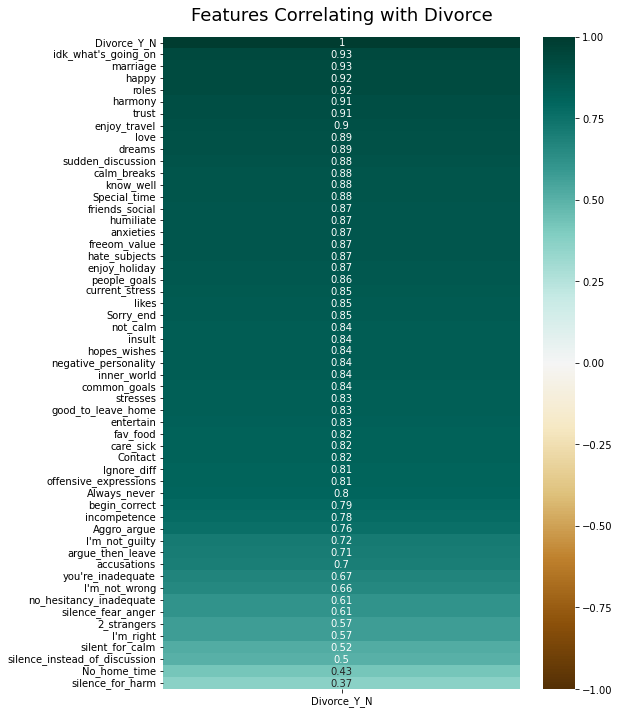

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Divorce_Y_N']].sort_values(by='Divorce_Y_N', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Divorce', fontdict={'fontsize':18}, pad=16);

In [ ]:
def plot_k_values(data, ks):
  """plot the silhouette score and inertia 
  of a KMeans model for various k values"""

  sils = []
  inertias = []

  for k in ks:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(data)
    sils.append(silhouette_score(data, km.labels_))
    inertias.append(km.inertia_)
      
    # plot inertia and silhouette score
  fig, ax1 = plt.subplots(figsize=(9,7))
  ax1.set_xlabel('number of clusters')
  ax1.set_ylabel('Inertia', color = 'blue')
  ax1.plot(ks, inertias, color = 'blue',label='inertia',marker ='o')

  ax2 = ax1.twinx()
  
  ax2.set_ylabel('Silhouette Score', color = 'red')
  ax2.plot(ks, sils, color = 'red',label='silhouette score',marker='+')
  ax1.legend(loc=0)  
  ax2.legend(loc='upper left')
  plt.grid()
  plt.show()

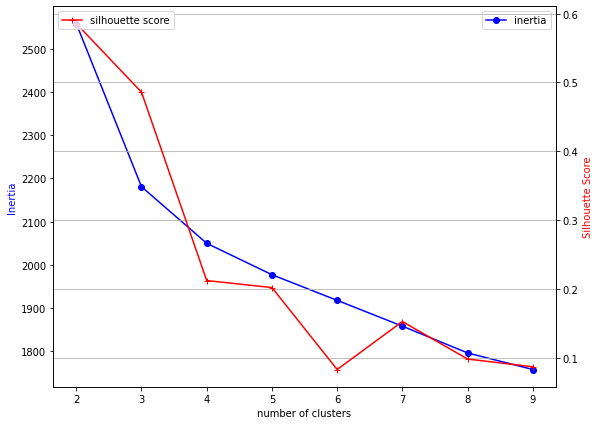

In [ ]:
plot_k_values(df_scaled,range(2,10))

In [ ]:
kmeans_final = KMeans(n_clusters = 2)
kmeans_final.fit(df_scaled)

df['cluster'] = kmeans_final.labels_

In [ ]:
clusters_grouped = df.groupby('cluster').mean()
clusters_grouped

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
cluster,,,,,,,,,,,,,,,,,,,,,
0,3.258065,2.935484,2.967742,2.887097,3.064516,1.161290,1.161290,2.903226,3.000000,2.951613,...,3.048387,3.290323,3.419355,3.451613,3.467742,3.322581,3.435484,3.241935,3.354839,1.000000
1,0.443182,0.511364,0.693182,0.295455,0.125000,0.420455,0.011364,0.136364,0.068182,0.431818,...,1.965909,1.227273,2.056818,1.352273,1.420455,1.602273,1.602273,1.215909,0.681818,0.045455


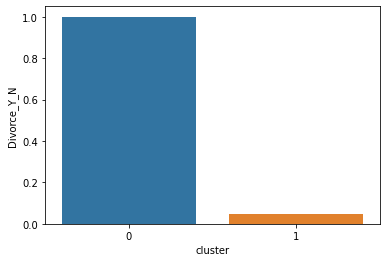

In [ ]:
sns.barplot(data=clusters_grouped, x=clusters_grouped.index, y="Divorce_Y_N");

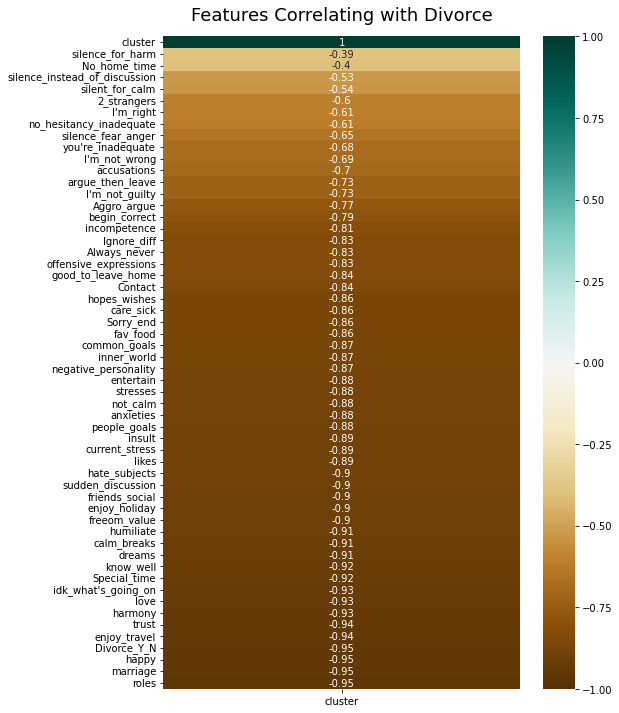

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['cluster']].sort_values(by='cluster', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Divorce', fontdict={'fontsize':18}, pad=16);

In [ ]:
X = df.drop(columns = ['Divorce_Y_N','cluster'])
y = df['Divorce_Y_N']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,stratify=y)

Text(0, 0.5, 'Proportion of Explained Variance')

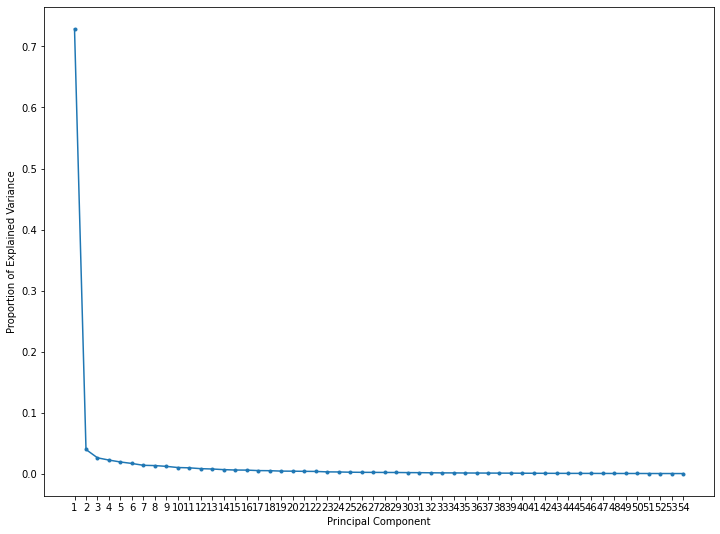

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA()
pca.fit(X_train_scaled)

plt.figure(figsize=(12, 9))
plt.plot(range(1, 55), pca.explained_variance_ratio_[:55], marker = '.')
plt.xticks(ticks = range(1, 55))
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

In [ ]:
pca4 = PCA(n_components=4)
X_train_pca4 = pca4.fit_transform(X_train_scaled)
X_test_pca4 = pca4.transform(X_test_scaled)

In [ ]:
difference = X_train_scaled.shape[1] - X_train_pca4.shape[1]

print(f'There are {difference} fewer columns after applying PCA')

There are 50 fewer columns after applying PCA


In [ ]:
variance = pca4.explained_variance_ratio_.sum()
print(f'The pca explains {variance:.2f} percent of the variance of the original data')

The pca explains 0.82 percent of the variance of the original data


#Model

In [ ]:
# You can use this function to see how your model improves over time
def plot_history(history, metric=None):
  """plot loss and passed metric.  metric is passed as string and must match 'metric'
  argument in the compile step"""
  fig, axes = plt.subplots(2,1, figsize = (5,10))
  axes[0].plot(history.history['loss'], label = "train")
  axes[0].plot(history.history['val_loss'], label='test')
  axes[0].set_title('Loss')
  axes[0].legend()
  if metric:
    axes[1].plot(history.history[metric], label = 'train')
    axes[1].plot(history.history['val_' + metric], label = 'test')
    axes[1].set_title(metric)
    axes[1].legend()

  plt.show()
'''
Extract info for each layer in a keras model.
'''
def utils_nn_config(model):
    lst_layers = []
    if "Sequential" in str(model): #-> Sequential doesn't show the input layer
        layer = model.layers[0]
        lst_layers.append({"name":"input", "in":int(layer.input.shape[-1]), "neurons":0, 
                           "out":int(layer.input.shape[-1]), "activation":None,
                           "params":0, "bias":0})
    for layer in model.layers:
        try:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":layer.units, 
                         "out":int(layer.output.shape[-1]), "activation":layer.get_config()["activation"],
                         "params":layer.get_weights()[0], "bias":layer.get_weights()[1]}
        except:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":0, 
                         "out":int(layer.output.shape[-1]), "activation":None,
                         "params":0, "bias":0}
        lst_layers.append(dic_layer)
    return lst_layers

def visualize_nn(model, description=False, figsize=(10,8)):
    ## get layers info
    lst_layers = utils_nn_config(model)
    layer_sizes = [layer["out"] for layer in lst_layers]
    
    ## fig setup
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set(title=model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right-left) / float(len(layer_sizes)-1)
    y_space = (top-bottom) / float(max(layer_sizes))
    p = 0.025
    
    ## nodes
    for i,n in enumerate(layer_sizes):
        top_on_layer = y_space*(n-1)/2.0 + (top+bottom)/2.0
        layer = lst_layers[i]
        color = "green" if i in [0, len(layer_sizes)-1] else "blue"
        color = "red" if (layer['neurons'] == 0) and (i > 0) else color
        
        ### add description
        if (description is True):
            d = i if i == 0 else i-0.5
            if layer['activation'] is None:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
            else:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
                plt.text(x=left+d*x_space, y=top-p, fontsize=10, color=color, s=layer['activation']+" (")
                plt.text(x=left+d*x_space, y=top-2*p, fontsize=10, color=color, s="Σ"+str(layer['in'])+"[X*w]+b")
                out = " Y"  if i == len(layer_sizes)-1 else " out"
                plt.text(x=left+d*x_space, y=top-3*p, fontsize=10, color=color, s=") = "+str(layer['neurons'])+out)
        
        ### circles
        for m in range(n):
            color = "limegreen" if color == "green" else color
            circle = plt.Circle(xy=(left+i*x_space, top_on_layer-m*y_space-4*p), radius=y_space/4.0, color=color, ec='k', zorder=4)
            ax.add_artist(circle)
            
            ### add text
            if i == 0:
                plt.text(x=left-4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$X_{'+str(m+1)+'}$')
            elif i == len(layer_sizes)-1:
                plt.text(x=right+4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$y_{'+str(m+1)+'}$')
            else:
                plt.text(x=left+i*x_space+p, y=top_on_layer-m*y_space+(y_space/8.+0.01*y_space)-4*p, fontsize=10, s=r'$H_{'+str(m+1)+'}$')
    
    ## links
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = lst_layers[i+1]
        color = "green" if i == len(layer_sizes)-2 else "blue"
        color = "red" if layer['neurons'] == 0 else color
        layer_top_a = y_space*(n_a-1)/2. + (top+bottom)/2. -4*p
        layer_top_b = y_space*(n_b-1)/2. + (top+bottom)/2. -4*p
        for m in range(n_a):
            for o in range(n_b):
                line = plt.Line2D([i*x_space+left, (i+1)*x_space+left], 
                                  [layer_top_a-m*y_space, layer_top_b-o*y_space], 
                                  c=color, alpha=0.5)
                if layer['activation'] is None:
                    if o == m:
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)
    plt.show()


In [ ]:
model1 = Sequential()

model1.add(Dense(500, input_dim = X_train_pca4.shape[1],
                activation = 'relu'))
model1.add(Dense(500,activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))

model1.compile(loss='bce', optimizer='adam', metrics=['acc'])

In [ ]:
history = model1.fit(X_train_pca4, y_train,
                    validation_data=(X_test_pca4, y_test),
                    epochs=30)

Epoch 1/30
4/4 [==============================] - 1s 80ms/step - loss: 0.3573 - acc: 0.8214 - val_loss: 0.0842 - val_acc: 0.9737
Epoch 2/30
4/4 [==============================] - 0s 15ms/step - loss: 0.0790 - acc: 0.9732 - val_loss: 0.0815 - val_acc: 0.9737
Epoch 3/30
4/4 [==============================] - 0s 15ms/step - loss: 0.0779 - acc: 0.9732 - val_loss: 0.0833 - val_acc: 0.9737
Epoch 4/30
4/4 [==============================] - 0s 14ms/step - loss: 0.0755 - acc: 0.9732 - val_loss: 0.0810 - val_acc: 0.9737
Epoch 5/30
4/4 [==============================] - 0s 14ms/step - loss: 0.0673 - acc: 0.9732 - val_loss: 0.0742 - val_acc: 0.9737
Epoch 6/30
4/4 [==============================] - 0s 19ms/step - loss: 0.0605 - acc: 0.9732 - val_loss: 0.0701 - val_acc: 0.9737
Epoch 7/30
4/4 [==============================] - 0s 15ms/step - loss: 0.0574 - acc: 0.9732 - val_loss: 0.0708 - val_acc: 0.9737
Epoch 8/30
4/4 [==============================] - 0s 15ms/step - loss: 0.0560 - acc: 0.9821 - val

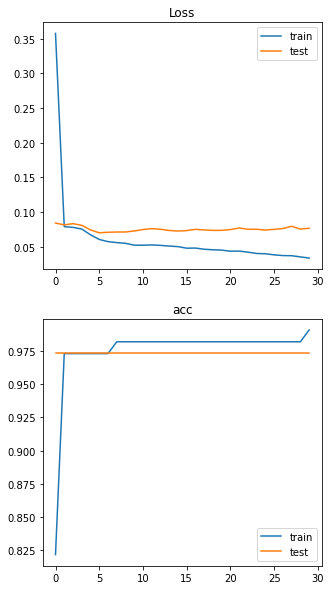

In [ ]:
plot_history(history, metric='acc')

In [ ]:
preds = np.rint(model1.predict(X_test_pca4))

print(classification_report(y_test, preds))

confusion_matrix(y_test, preds, normalize='true')

2/2 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.94      0.97        17

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.97      0.97      0.97        38



array([[1.        , 0.        ],
       [0.05882353, 0.94117647]])

In [ ]:
model2 = Sequential()

model2.add(Dense(10, input_dim = X_train_pca4.shape[1],
                activation = 'relu'))
model2.add(Dense(20, activation = 'relu'))
model2.add(Dense(10, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))

model2.compile(loss='bce', optimizer='adam', metrics=['acc'])

In [ ]:
history = model2.fit(X_train_pca4, y_train,
                    validation_data=(X_test_pca4, y_test),
                    epochs=30)

Epoch 1/30
4/4 [==============================] - 1s 71ms/step - loss: 0.5539 - acc: 0.9464 - val_loss: 0.5259 - val_acc: 0.9737
Epoch 2/30
4/4 [==============================] - 0s 11ms/step - loss: 0.5029 - acc: 0.9643 - val_loss: 0.4792 - val_acc: 0.9737
Epoch 3/30
4/4 [==============================] - 0s 12ms/step - loss: 0.4518 - acc: 0.9643 - val_loss: 0.4292 - val_acc: 0.9737
Epoch 4/30
4/4 [==============================] - 0s 11ms/step - loss: 0.3995 - acc: 0.9643 - val_loss: 0.3807 - val_acc: 0.9737
Epoch 5/30
4/4 [==============================] - 0s 11ms/step - loss: 0.3515 - acc: 0.9643 - val_loss: 0.3381 - val_acc: 0.9737
Epoch 6/30
4/4 [==============================] - 0s 16ms/step - loss: 0.3086 - acc: 0.9732 - val_loss: 0.3013 - val_acc: 0.9737
Epoch 7/30
4/4 [==============================] - 0s 12ms/step - loss: 0.2701 - acc: 0.9732 - val_loss: 0.2698 - val_acc: 0.9737
Epoch 8/30
4/4 [==============================] - 0s 11ms/step - loss: 0.2389 - acc: 0.9732 - val

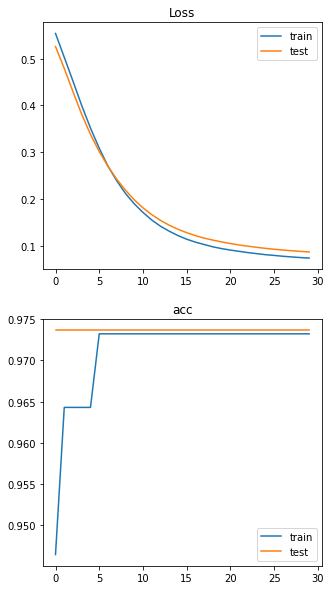

In [ ]:
plot_history(history, metric='acc')

In [ ]:
preds = np.rint(model2.predict(X_test_pca4))

print(classification_report(y_test, preds))

confusion_matrix(y_test, preds, normalize='true')

2/2 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.94      0.97        17

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.97      0.97      0.97        38



array([[1.        , 0.        ],
       [0.05882353, 0.94117647]])

In [ ]:
earlystopping = EarlyStopping(patience=10)
model3 = Sequential()

model3.add(Dense(10, input_dim = X_train_pca4.shape[1],
                activation = 'relu'))
model3.add(Dropout(.5))
model3.add(Dense(20, activation = 'relu'))
model3.add(Dropout(.5))
model3.add(Dense(10, activation = 'relu'))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(loss='bce', optimizer='adam', metrics=['acc'])

In [ ]:
history = model3.fit(X_train_pca4, y_train,
                    validation_data=(X_test_pca4, y_test),
                    epochs=30,
                    callbacks=([earlystopping]))

Epoch 1/30
4/4 [==============================] - 1s 71ms/step - loss: 0.7786 - acc: 0.5982 - val_loss: 0.6293 - val_acc: 0.5526
Epoch 2/30
4/4 [==============================] - 0s 10ms/step - loss: 0.8184 - acc: 0.5625 - val_loss: 0.5958 - val_acc: 0.5789
Epoch 3/30
4/4 [==============================] - 0s 14ms/step - loss: 0.7213 - acc: 0.5625 - val_loss: 0.5650 - val_acc: 0.7105
Epoch 4/30
4/4 [==============================] - 0s 10ms/step - loss: 0.7053 - acc: 0.6429 - val_loss: 0.5424 - val_acc: 0.8684
Epoch 5/30
4/4 [==============================] - 0s 11ms/step - loss: 0.6744 - acc: 0.6696 - val_loss: 0.5230 - val_acc: 0.8947
Epoch 6/30
4/4 [==============================] - 0s 10ms/step - loss: 0.6415 - acc: 0.6250 - val_loss: 0.5038 - val_acc: 0.8947
Epoch 7/30
4/4 [==============================] - 0s 10ms/step - loss: 0.6041 - acc: 0.6607 - val_loss: 0.4858 - val_acc: 0.8947
Epoch 8/30
4/4 [==============================] - 0s 16ms/step - loss: 0.6604 - acc: 0.6429 - val

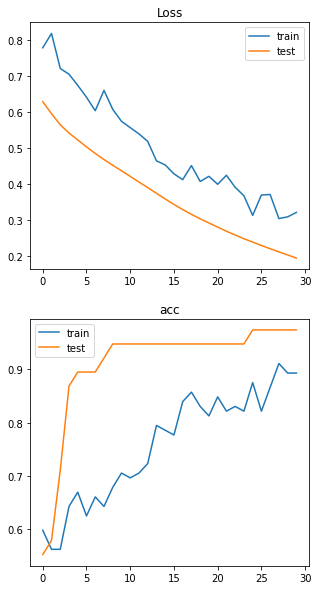

In [ ]:
plot_history(history, metric='acc')

In [ ]:
preds = np.rint(model3.predict(X_test_pca4))

print(classification_report(y_test, preds))

confusion_matrix(y_test, preds, normalize='true')

2/2 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.94      0.97        17

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.97      0.97      0.97        38



array([[1.        , 0.        ],
       [0.05882353, 0.94117647]])

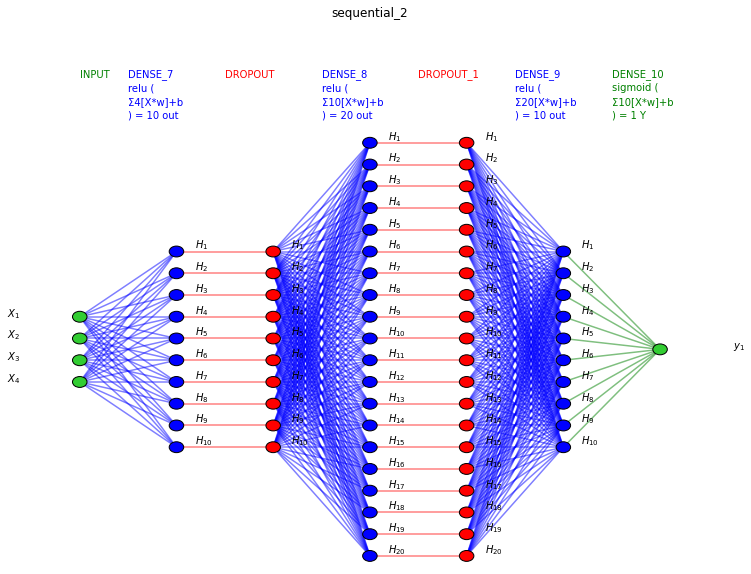

In [ ]:
visualize_nn(model3, description=True, figsize=(13,10))

In [ ]:
rf = RandomForestClassifier(random_state = 42)

In [ ]:
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
preds=np.rint(rf.predict(X_test_scaled))

In [ ]:
rf_train_score = rf.score(X_train_scaled, y_train)
rf_test_score = rf.score(X_test_scaled, y_test)
print(rf_train_score)
print(rf_test_score)
print(classification_report(y_test, preds))

confusion_matrix(y_test, preds, normalize='true')

1.0
0.9736842105263158
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.94      0.97        17

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.97      0.97      0.97        38



array([[1.        , 0.        ],
       [0.05882353, 0.94117647]])

In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
17,marriage,0.165
16,happy,0.119
10,harmony,0.096
19,trust,0.074
18,roles,0.072
39,idk_what's_going_on,0.068
11,freeom_value,0.037
15,love,0.036
25,anxieties,0.035
8,enjoy_travel,0.033


In [ ]:
importances = importances[importances['importance']>0]
importances

,feature,importance
17,marriage,0.165
16,happy,0.119
10,harmony,0.096
19,trust,0.074
18,roles,0.072
39,idk_what's_going_on,0.068
11,freeom_value,0.037
15,love,0.036
25,anxieties,0.035
8,enjoy_travel,0.033


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


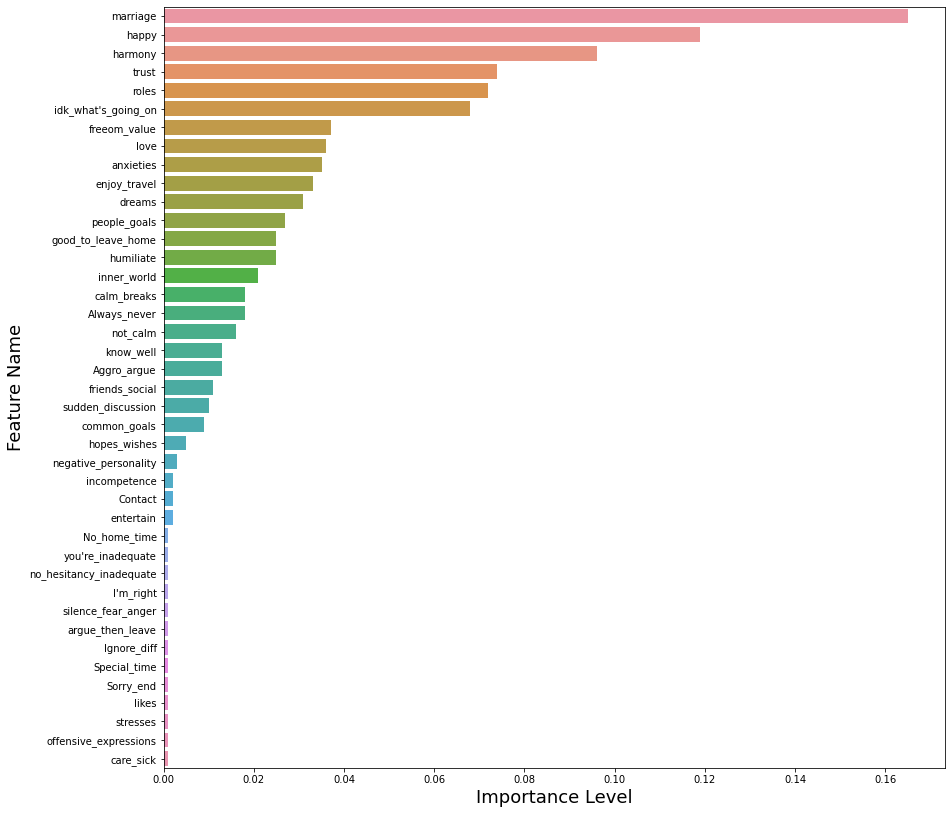

In [ ]:
feature_names = X_train.columns.values
fig = plt.figure(figsize =(14, 14))
sns.barplot(importances['importance'], importances['feature']);
#plt.xticks(rotation = 90)
plt.xlabel("Importance Level", size=18)
plt.ylabel("Feature Name", size=18)
plt.savefig('Importances.png', dpi = 300)

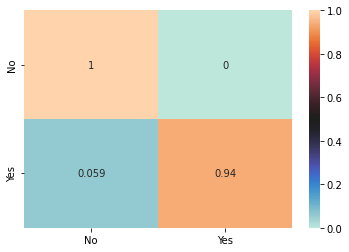

In [ ]:

# Define labels for the confusion matrix
labels = ['No', 'Yes']


# Confusion Matrix
conf_mat = confusion_matrix(y_test, preds, normalize='true')
sns.heatmap(conf_mat, xticklabels=labels, yticklabels=labels, annot=True,cmap='icefire')
plt.show()